In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("farm_water_management_preprocessing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Farm ID                      510 non-null    int64  
 1   Location                     510 non-null    object 
 2   Farm Size (Acres)            510 non-null    object 
 3   Crop Type                    510 non-null    object 
 4   Water Availability (mm)      491 non-null    float64
 5   Soil Moisture (%)            495 non-null    float64
 6   Precipitation Forecast (mm)  500 non-null    float64
 7   Irrigation Need (mm)         510 non-null    int64  
 8   Risk Level                   510 non-null    object 
 9   Decision Recommendation      510 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 40.0+ KB


In [4]:
df.isnull().sum()

Farm ID                         0
Location                        0
Farm Size (Acres)               0
Crop Type                       0
Water Availability (mm)        19
Soil Moisture (%)              15
Precipitation Forecast (mm)    10
Irrigation Need (mm)            0
Risk Level                      0
Decision Recommendation         0
dtype: int64

In [5]:
def replace_invalid_type(column, target_type):
    return column.apply(lambda x: x if isinstance(x, target_type) else np.nan)

In [6]:
df['Water Availability (mm)'] = pd.to_numeric(df['Water Availability (mm)'], errors='coerce')
df['Soil Moisture (%)'] = pd.to_numeric(df['Soil Moisture (%)'], errors='coerce')
df['Precipitation Forecast (mm)'] = pd.to_numeric(df['Precipitation Forecast (mm)'], errors='coerce')


In [7]:
df['Water Availability (mm)'] = replace_invalid_type(df['Water Availability (mm)'], float)
df['Precipitation Forecast (mm)'] = replace_invalid_type(df['Precipitation Forecast (mm)'], float)


In [8]:
df["Water Availability (mm)"] = df["Water Availability (mm)"].fillna(df["Water Availability (mm)"].mode()[0])
df["Soil Moisture (%)"] = df["Soil Moisture (%)"].fillna(df["Soil Moisture (%)"].mode()[0])
df["Precipitation Forecast (mm)"] = df["Precipitation Forecast (mm)"].fillna(df["Precipitation Forecast (mm)"].mode()[0])

In [9]:
df.dtypes

Farm ID                          int64
Location                        object
Farm Size (Acres)               object
Crop Type                       object
Water Availability (mm)        float64
Soil Moisture (%)              float64
Precipitation Forecast (mm)    float64
Irrigation Need (mm)             int64
Risk Level                      object
Decision Recommendation         object
dtype: object

In [10]:
df.head()

,Farm ID,Location,Farm Size (Acres),Crop Type,Water Availability (mm),Soil Moisture (%),Precipitation Forecast (mm),Irrigation Need (mm),Risk Level,Decision Recommendation
0,101,"40.7128, -74.0060",324,Wheat,189.0,42.0,42.0,24,Low,Irrigate lightly
1,102,"34.0522, -118.2437",562,Soy,218.0,36.0,30.0,29,High,Irrigate as needed
2,103,"29.7604, -95.3698",543,Corn,255.0,32.0,27.0,33,Medium,Increase water monitoring
3,104,"41.8781, -87.6298",411,Barley,154.0,45.0,38.0,33,High,Irrigate lightly
4,105,"41.8781, -87.6298",110,Soy,137.0,47.0,26.0,21,Low,Monitor soil moisture


In [11]:
df['Farm Size (Acres)'] = pd.to_numeric(df['Farm Size (Acres)'], errors='coerce')
median_farm_size = df['Farm Size (Acres)'].median()
df['Farm Size (Acres)'] = df['Farm Size (Acres)'].fillna(median_farm_size)

In [12]:
df.isnull().sum()

Farm ID                        0
Location                       0
Farm Size (Acres)              0
Crop Type                      0
Water Availability (mm)        0
Soil Moisture (%)              0
Precipitation Forecast (mm)    0
Irrigation Need (mm)           0
Risk Level                     0
Decision Recommendation        0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Risk Level"]=le.fit_transform(df["Risk Level"])

In [14]:
df["Risk Level"]

0      1
1      0
2      2
3      0
4      1
      ..
505    2
506    0
507    2
508    0
509    1
Name: Risk Level, Length: 510, dtype: int64

In [15]:
df["Crop Type"].value_counts()

Crop Type
Soy       135
Corn      101
Wheat      98
Barley     95
Rice       81
Name: count, dtype: int64

In [16]:
df.to_csv("Nasa.csv")

In [17]:
df

,Farm ID,Location,Farm Size (Acres),Crop Type,Water Availability (mm),Soil Moisture (%),Precipitation Forecast (mm),Irrigation Need (mm),Risk Level,Decision Recommendation
0,101,"40.7128, -74.0060",324.0,Wheat,189.0,42.0,42.0,24,1,Irrigate lightly
1,102,"34.0522, -118.2437",562.0,Soy,218.0,36.0,30.0,29,0,Irrigate as needed
2,103,"29.7604, -95.3698",543.0,Corn,255.0,32.0,27.0,33,2,Increase water monitoring
3,104,"41.8781, -87.6298",411.0,Barley,154.0,45.0,38.0,33,0,Irrigate lightly
4,105,"41.8781, -87.6298",110.0,Soy,137.0,47.0,26.0,21,1,Monitor soil moisture
...,...,...,...,...,...,...,...,...,...,...
505,153,"36.7783, -119.4179",362.0,Soy,128.0,37.0,26.0,29,2,Irrigate lightly
506,280,"34.0522, -118.2437",181.0,Barley,197.0,30.0,30.0,20,0,Monitor soil moisture
507,187,"36.7783, -119.4179",280.0,Corn,269.0,33.0,49.0,37,2,Monitor soil moisture
508,393,"36.7783, -119.4179",126.0,Corn,291.0,50.0,22.0,20,0,Irrigate as needed


In [18]:
df.dtypes

Farm ID                          int64
Location                        object
Farm Size (Acres)              float64
Crop Type                       object
Water Availability (mm)        float64
Soil Moisture (%)              float64
Precipitation Forecast (mm)    float64
Irrigation Need (mm)             int64
Risk Level                       int64
Decision Recommendation         object
dtype: object

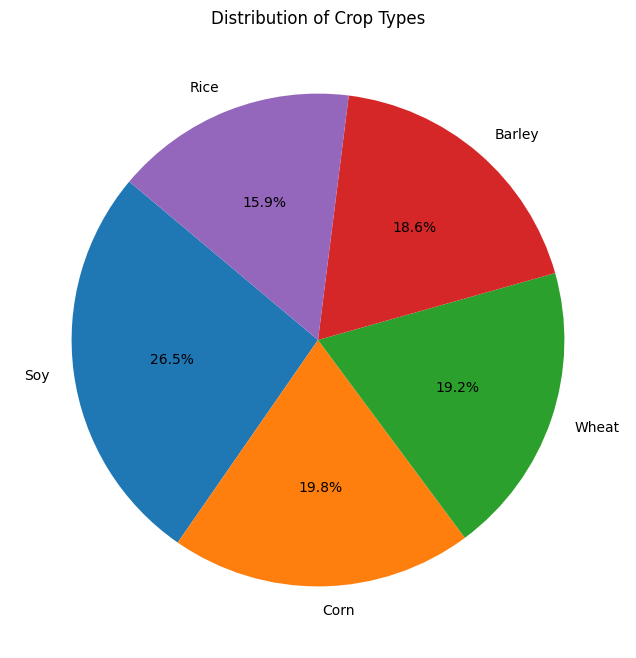

In [26]:
import matplotlib.pyplot as plt
crop_counts = df["Crop Type"].value_counts()
sizes = crop_counts.values
labels = crop_counts.index

plt.figure(figsize=(8, 8)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crop Types')
plt.show()


Text(0.5, 1.0, 'Risk Level')

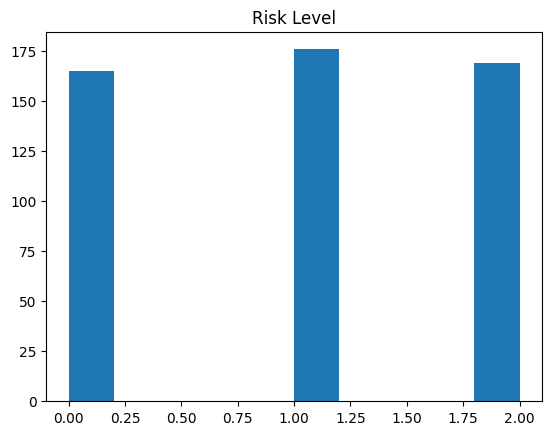

In [33]:
plt.hist(df["Risk Level"])
plt.title("Risk Level")

In [43]:
import seaborn as sns

/var/folders/h8/6p4k9gpj52g9xjrh452vpgh80000gn/T/ipykernel_6062/853627240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Decision Recommendation', data=df, palette='pastel')


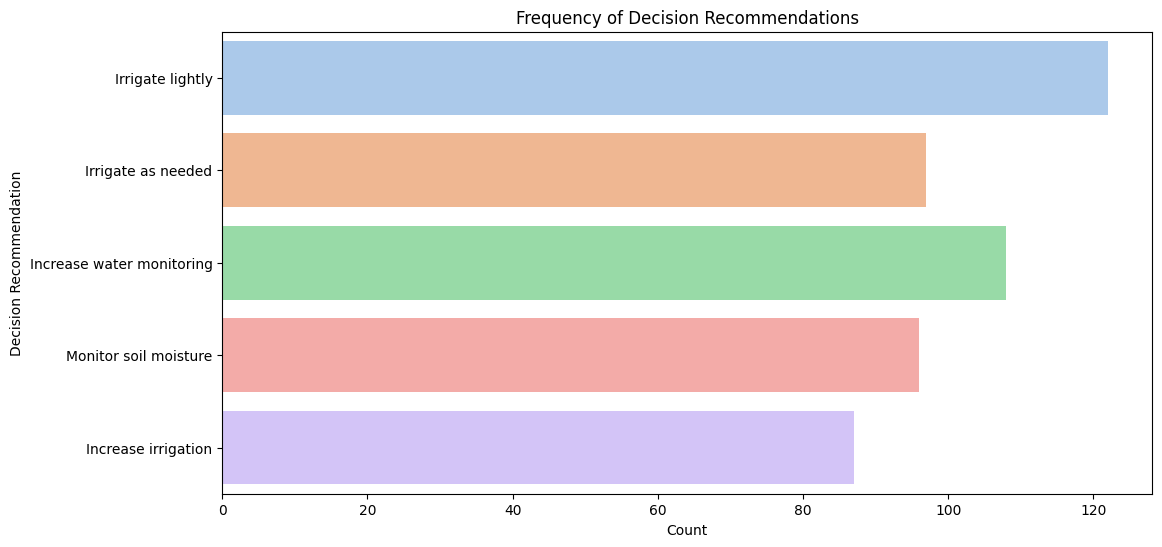

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Decision Recommendation', data=df, palette='pastel')
plt.title('Frequency of Decision Recommendations')
plt.xlabel('Count')
plt.ylabel('Decision Recommendation')
plt.show()